# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [3]:
df = pd.read_csv('../data/dayofweek.csv')
df.head()

,dayOfWeek,hour_scaled,numTrials_scaled,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-2.562352,-0.788667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-2.562352,-0.756764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-2.562352,-0.724861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-2.562352,-0.692958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-2.562352,-0.661055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
X = df.drop('dayOfWeek', axis=1)
y = df['dayOfWeek']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=21
)


In [29]:
y_train.value_counts()

dayOfWeek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64

In [30]:
y_test.value_counts()

dayOfWeek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64

In [34]:
df_counts = pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1)
df_counts.columns = ['train', 'test']
df_counts.index.name = 'dayofweek'
df_counts['p_train']=(df_counts['train']*100)/(df_counts['train']+df_counts['test'])
df_counts['p_test']=100-df_counts['p_train']
df_counts

,train,test,p_train,p_test
dayofweek,,,,
3,313,83,79.040404,20.959596
6,287,69,80.617978,19.382022
1,222,52,81.021898,18.978102
5,216,55,79.704797,20.295203
2,125,24,83.892617,16.107383
0,105,31,77.205882,22.794118
4,80,24,76.923077,23.076923


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=21,
    stratify=y
)

In [36]:
y_train.value_counts()


dayOfWeek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

In [37]:
y_test.value_counts()


dayOfWeek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64

In [38]:
df_counts = pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1)
df_counts.columns = ['train', 'test']
df_counts.index.name = 'dayofweek'
df_counts['p_train']=(df_counts['train']*100)/(df_counts['train']+df_counts['test'])
df_counts['p_test']=100-df_counts['p_train']
df_counts

,train,test,p_train,p_test
dayofweek,,,,
3,316,80,79.797980,20.202020
6,285,71,80.056180,19.943820
1,219,55,79.927007,20.072993
5,217,54,80.073801,19.926199
2,119,30,79.865772,20.134228
0,109,27,80.147059,19.852941
4,83,21,79.807692,20.192308


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [50]:
logist = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
logist.fit(X_train, y_train)
y_pred = logist.predict(X_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

### b. SVM

In [49]:
svm = SVC(random_state=21, probability=True, kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.7159763313609467

### c. Decision tree

In [42]:
tree = DecisionTreeClassifier(random_state=21, max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.5295857988165681

### d. Random forest

In [43]:
forest = RandomForestClassifier(random_state=21, max_depth=25, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9289940828402367

## 📊 Сравнение точности моделей: до и после `stratify`

| Модель               | Accuracy (до stratify) | Accuracy (после stratify) |
|----------------------|------------------------|----------------------------|
| Logistic Regression  | 64.06%                 | 61.54%                     |
| SVC (linear kernel)  | 70.28%                 | 71.60%                     |
| Decision Tree (depth=4) | 55.16%              | 52.96%                     |
| Random Forest        | **100.00%**            | **92.90%**                 |

---

## 📌 Вывод

Не все модели показали одинаковые значения метрик.  
Наибольшее изменение произошло у **Random Forest** — его точность снизилась с 100% до ~93%, что свидетельствует о сильном переобучении без стратификации.  
Также **Decision Tree** показал небольшое снижение точности, подтверждая чувствительность одиночного дерева к распределению классов.

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [62]:
scores = cross_val_score(logist, X_train, y_train, cv=10)
print(f'mean={scores.mean():.2f}, standartd deviantion={scores.std():.2f}')

mean=0.58, standartd deviantion=0.03


### b. SVM

In [63]:
scores = cross_val_score(svm, X_train, y_train, cv=10)
print(f'mean={scores.mean():.2f}, standartd deviantion={scores.std():.2f}')

mean=0.66, standartd deviantion=0.04


### c. Decision tree

In [64]:
scores = cross_val_score(tree, X_train, y_train, cv=10)
print(f'mean={scores.mean():.2f}, standartd deviantion={scores.std():.2f}')

mean=0.51, standartd deviantion=0.03


### d. Random forest

In [65]:
scores = cross_val_score(forest, X_train, y_train, cv=10)
print(f'mean={scores.mean():.2f}, standartd deviantion={scores.std():.2f}')

mean=0.91, standartd deviantion=0.01


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [66]:
def plot_top_features(coef_matrix, feature_names, top_n=10):
    """
    Строит barh-график top_n признаков по абсолютной важности.
    
    coef_matrix : np.ndarray, shape = (n_classes, n_features)
    feature_names : list of str, длина = n_features
    top_n : int — сколько признаков показать
    """
    # 1. Считаем общую важность каждого признака по всем классам
        
    if coef_matrix.ndim == 1:
        importance = np.abs(coef_matrix)
    else:
        importance = np.sum(np.abs(coef_matrix), axis=0)

    # 2. Берем индексы top-n по убыванию
    top_idx = np.argsort(importance)[-top_n:]

    # 3. Строим график
    plt.figure(figsize=(10, 6))
    plt.barh(np.array(feature_names)[top_idx], importance[top_idx])
    plt.xlabel('Суммарная важность признака (по всем классам)')
    plt.title(f'Top {top_n} most important features')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [69]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20, 25, None]
}

In [72]:
rf = RandomForestClassifier(random_state=21)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # использовать все ядра
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25, None],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [73]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая средняя точность (cv):", grid_search.best_score_)

Лучшие параметры: {'max_depth': None, 'n_estimators': 150}
Лучшая средняя точность (cv): 0.9005920418559823


In [75]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9349112426035503

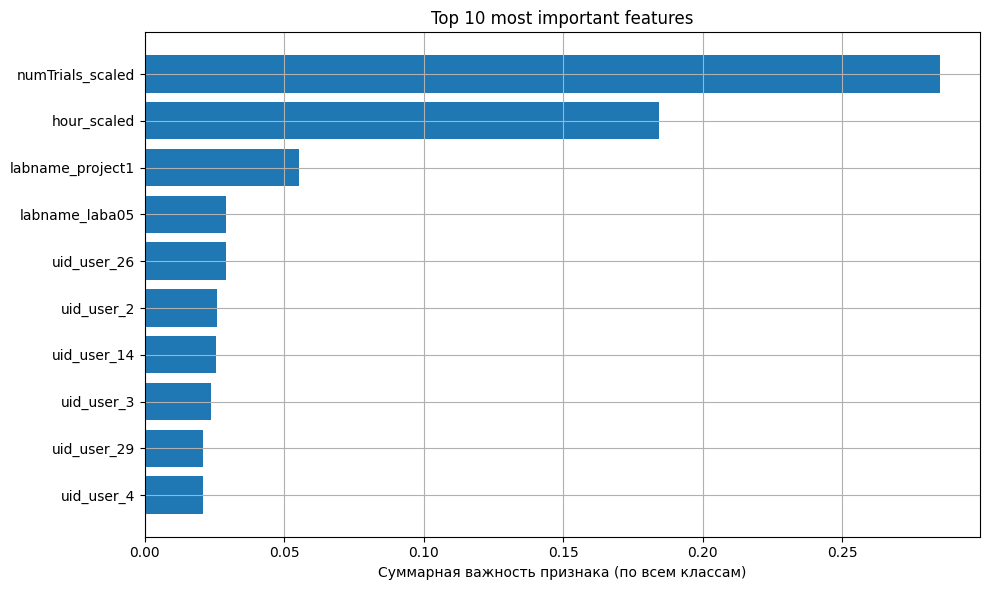

In [79]:
plot_top_features(final_model.feature_importances_,X.columns)

In [83]:
joblib.dump(final_model,'../data/best_model.pkl')

['../data/best_model.pkl']

In [86]:
best_model=joblib.load('../data/best_model.pkl')
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9349112426035503